In [15]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from tabulate import tabulate
import json

df = pd.read_csv("Datos_imagenes.csv")

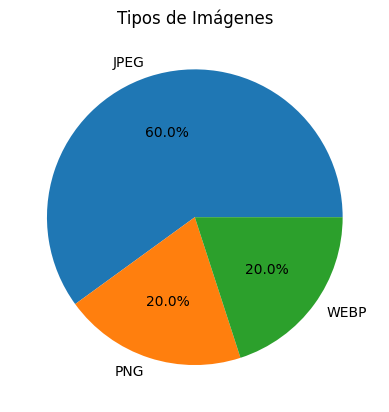

In [16]:
#Se cuentan los tipos de imagen que hay accediendo a la clave tipo
tipos = df['tipo'].value_counts()

#Se crea el grafico de pastel 
fig1, ax1 = plt.subplots()
ax1.pie(tipos, labels=tipos.index, autopct='%1.1f%%')
ax1.set_title('Tipos de Imágenes')

#Mostramos el grafico
plt.show()

In [17]:
#Calcular el ancho máximo y la altura máxima
TieneTags = df[df['tags'] != " "]
ancho = TieneTags['resolucion'].str.split('x').str[0].astype(int).max()
altura = TieneTags['resolucion'].str.split('x').str[1].astype(int).max()

#Imprimir ancho y altura maximo
print('Ancho maximo: ', ancho, 'pixeles.')
print('Altura maxima: ', altura, 'pixeles.')

Ancho maximo:  1511 pixeles.
Altura maxima:  1005 pixeles.


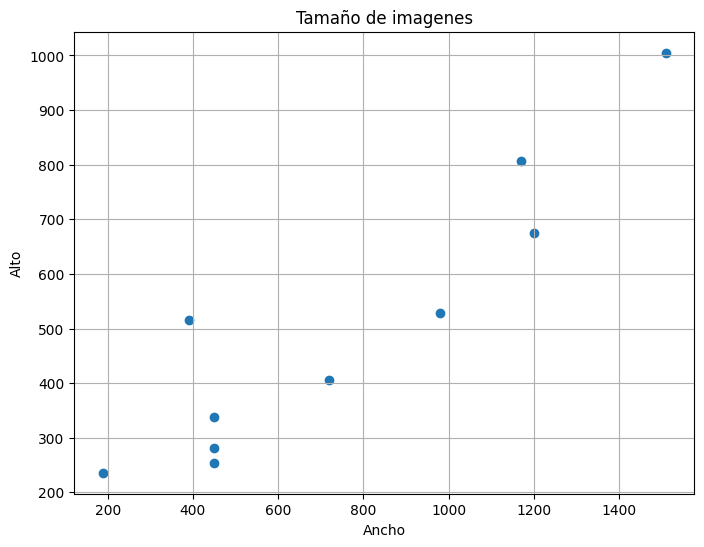

In [18]:
#Generar el grafico de dispersión para la relación entre ancho y alto
fig2, ax2 = plt.subplots(figsize=(8, 6))
ax2.scatter(TieneTags['resolucion'].str.split('x').str[0].astype(int), TieneTags['resolucion'].str.split('x').str[1].astype(int))
ax2.set_xlabel('Ancho')
ax2.set_ylabel('Alto')

#Titulo del graficos
ax2.set_title('Tamaño de imagenes')
ax2.grid(True)

#Mostrar el grafico
plt.show(fig2)

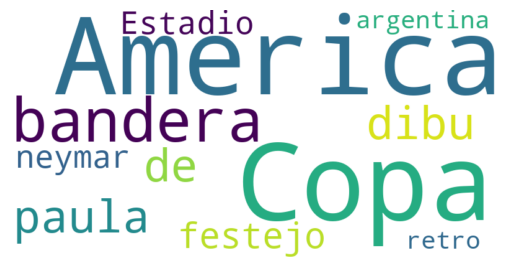

In [19]:
#Obtener la lista de tags
tags = df['tags'].str.cat(sep=' ')

#Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tags)

#Mostrar la nube de palabras
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [20]:
#Obtener los 3 tags más utilizados
tags_count = df['tags'].str.split(',').explode().str.strip().value_counts().head(3)

#Crear la tabla de los 3 tags más utilizados
tags_table = pd.DataFrame({'#': range(1, 4), 'Tag': tags_count.index, 'Usos': tags_count.values})

#Mostrar la tabla en formato "tabulador" (lo hacemos de esta manera para no repetir el diseño de la tabla de bytes)
print('Tags más utilizados: ')
print(tabulate(tags_table, headers='keys', tablefmt='psql', showindex=False))


Tags más utilizados: 
+-----+-------------------+--------+
|   # | Tag               |   Usos |
|-----+-------------------+--------|
|   1 | Copa America 2021 |      2 |
|   2 | bandera           |      2 |
|   3 | de paula          |      1 |
+-----+-------------------+--------+


In [21]:
#Nos guardamos en una lista todos los nick almacenados en el archivo json.
with open("Archivo_Perfiles.json", 'r') as usuarios:
    perfiles = json.load(usuarios)
    lista_usuarios = []
    for nick in perfiles.keys() :
        lista_usuarios.append(nick)

#Crear una lista con los usuarios que modificaron alguna imagen.
usuarios_modificaron = df['ultimo_perfil']

#Crear un conjunto con los nicks que estan almacenados en la aplicacion, pero no estan en la lista de los que hicieorn modificaciones.
conjunto = set(lista_usuarios) - set(usuarios_modificaron)

#Si el conjunto no esta vacio, significa que hay nicks que no hicieron modificaciones.
if len(conjunto) > 0 :
    
    #Crear una lista de diccionarios con el nick y el tamanio promedio en 0, ya que no hicieron modificaciones en ninguna imagen.
    nueva_fila = []
    for usuario in conjunto :
        fila = {'ultimo_perfil': usuario, 'tamano': 0}
        nueva_fila.append(fila)
    
    #Crear un nuevo dataframe con esos datos, solo con las columnas de ultimo_perfil y tamanio
    nuevo_df = pd.DataFrame(nueva_fila)
    
    #Concatenar el dataframe anteriormente creado con el original, sin pisarlo
    nuevo_df = pd.concat([df[['ultimo_perfil','tamano']], nuevo_df], ignore_index=True)

else :
    #Si no hay usuarios que no hayan modificado imagenes, le asignamos las dos columnas que vamos a usar a nuevo_df
    nuevo_df = df[['ultimo_perfil', 'tamano']]

#Calcular el tamaño promedio en bytes de las imágenes actualizadas por cada perfil
promedio_tamaño = nuevo_df.groupby('ultimo_perfil')['tamano'].mean().astype(float)
promedio_tamaño_table = pd.DataFrame({'Perfil': promedio_tamaño.index, 'Tamaño Promedio': promedio_tamaño.values})

#Mostrar la tabla utilizando pandas
display(promedio_tamaño_table)

,Perfil,Tamaño Promedio
0,De Paul,0.110000
1,Di Maria,0.187500
2,Dibu,0.093333
3,Messi,0.100000
4,Montiel,0.080000


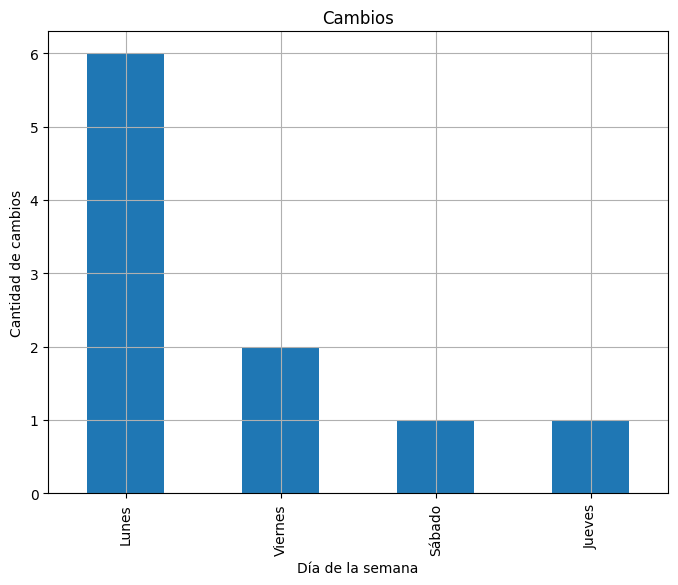

In [22]:
#Convertir la columna "ultima_actualizacion" a objetos datetime
df['ultima_actualizacion'] = pd.to_datetime(df['ultima_actualizacion'], unit='s')

#Calcular la cantidad de cambios por día de la semana
cambios_dia = df['ultima_actualizacion'].dt.dayofweek

#Definir una lista con los nombres de los días en español
nombres_dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']


cambios_dia = cambios_dia.map(lambda x: nombres_dias[x])

#Calcular la cantidad de cambios por dia de la semana
cambios_dia = cambios_dia.value_counts()

#Crear el grafico de barras
fig3, ax3 = plt.subplots(figsize=(8, 6))
cambios_dia.plot(kind='bar')

#Configurar el grafico
ax3.set_xlabel('Día de la semana')
ax3.set_ylabel('Cantidad de cambios')
ax3.set_title('Cambios')
ax3.grid(True)

#Mostrar el grafico de barras
plt.show()


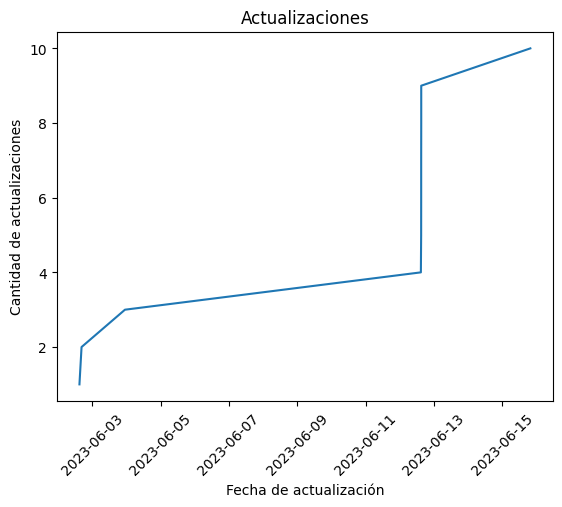

In [23]:
#Convertir la columna "ultima_actualizacion" al formato de fecha y hora
df['ultima_actualizacion'] = pd.to_datetime(df['ultima_actualizacion'], format='%d-%m-%Y')

#Se ordena el dataframe por la columna "ultima_actualizacion"
df = df.sort_values('ultima_actualizacion')

#Grafico de lineas
plt.plot(df['ultima_actualizacion'], range(1, len(df) + 1))
plt.xlabel('Fecha de actualización')
plt.ylabel('Cantidad de actualizaciones')
plt.title('Actualizaciones')
plt.xticks(rotation=45)

#Mostrar el grafico de lineas
plt.show()
